# Geometry display and flying of sirrated ESA
This example goes over some of the baseline functionality in simPyon, namely refining geometries, fast adjusting pas and outputting and plotting data.

Start with the basic imports

In [1]:
import simPyon as sim
import matplotlib
%matplotlib notebook

Load simion command environment

In [2]:
esa = sim.simion(gemfil = 'cirrated_electrostatic_analyzer.GEM')

C:\ProgramData\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


Note: electrode voltages are assigned by name. Name is declared by a commented out tag in the gemfile

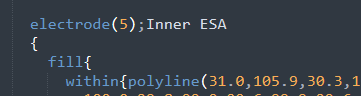

Show a cross section of the electrode geometry and overlay measurement ruler to check dimensions

<IPython.core.display.Javascript object>


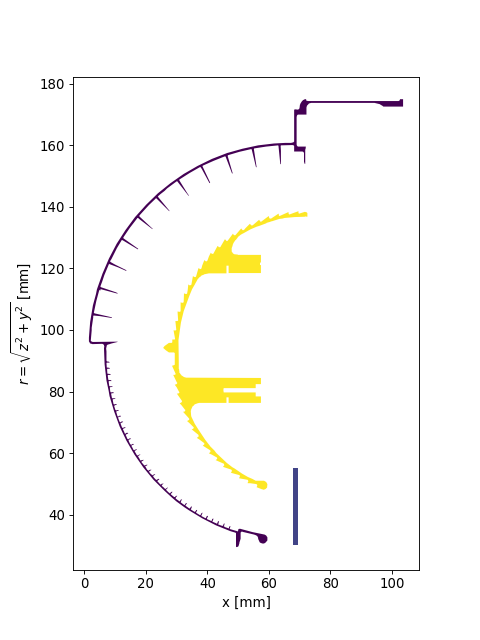

C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:208: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  e_tot+=len(elec)
C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:211: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in elec:


In [3]:
fig,ax = esa.show()
fig.set_size_inches(6,8)

convert the Gemfil to a .pa# file and refine the geometry

In [4]:
esa.gem2pa()

| Executing Simion Command:
simion.exe --nogui --noprompt --default-num-particles=1000000
gem2pa ./cirrated_electrostatic_analyzer.GEM ./simPyon0.pa#


In [5]:
esa.refine()

| Executing Simion Command:
simion.exe --nogui --noprompt --default-num-particles=1000000
refine ./simPyon0.pa#


Define your voltages and fast adjust the pa

In [6]:
esa.define_volts()


Input Inner ESA Voltage [V]:100
Input Outter Esa Voltage [V]:0
Input Stop plate Voltage [V]:200


{'Inner ESA': 100.0, 'Outter Esa': 0.0, 'Stop plate': 200.0}

In [15]:
esa.fast_adjust()

| Fast Adjusting with Voltage Settings:
| Inner ESA: 100.00 
| Outter Esa: 0.00 
| Stop plate: 200.00 
| Executing Simion Command:
simion.exe --nogui --noprompt --default-num-particles=1000000
fastadj ./simPyon0.pa0 5=100.000000,1=200.000000


<class 'simPyon.simPyon.simion.simion'> 
   Workbench:./simPyon_bench.iob 
   Gemfile: cirrated_electrostatic_analyzer.GEM 

Plot the potential array to verify voltage assignment

(289, 2)


<IPython.core.display.Javascript object>


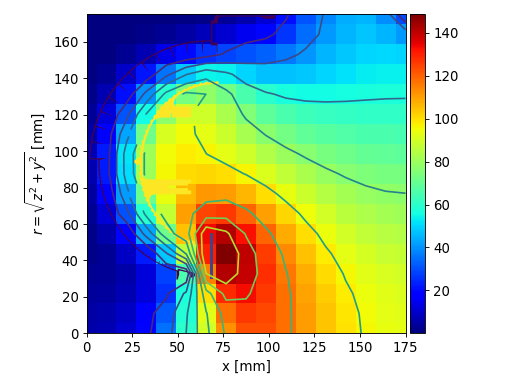

C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:208: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  e_tot+=len(elec)
C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:211: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in elec:
C:\ProgramData\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='x [mm]', ylabel='$r=\\sqrt{z^2 + y^2}$ [mm]'>)

In [18]:
esa.calc_pe()
esa.show_pe()

## Flying your particles and displaying trajectories
Define your particle source location and distribution. Default particle distributions can be set in ``simPyon/defaults.py``

In [19]:
esa.source['n'] = 10000
esa.source['mass'] = 1
esa.source['charge'] = -1
esa.source['ke'] = sim.particles.source('uniform')
esa.source['ke']['min'] = 100 # energy values are defined in ev
esa.source['ke']['max'] = 300
esa.source['az'] = sim.particles.source('gaussian')
esa.source['az']['mean'] = 0
esa.source['az']['fwhm'] = 24
esa.source['el'] = sim.particles.source('gaussian')
esa.source['el']['mean'] = 180
esa.source['el']['fwhm'] = 24
esa.source['pos'] = sim.particles.source('line')
esa.source['pos']['first'] = np.array([73.7,138,0])
esa.source['pos']['last'] = np.array([73.6,154.5,0])
esa.source

<class 'simPyon.simPyon.particles.auto_parts'>
   n: 10000
   mass: 1
   charge: -1
   ke: simPyon.particles.source: ['uniform', {'min': 100, 'max': 300}]
   az: simPyon.particles.source: ['gaussian', {'mean': 0, 'fwhm': 24}]
   el: simPyon.particles.source: ['gaussian', {'mean': 180, 'fwhm': 24}]
   pos: simPyon.particles.source: ['line', {'first': array([ 73.7, 138. ,   0. ]), 'last': array([ 73.6, 154.5,   0. ])}]
   tof: simPyon.particles.source: ['single', {'value': 0}]

Fly and plot 200 trajectories

<IPython.core.display.Javascript object>


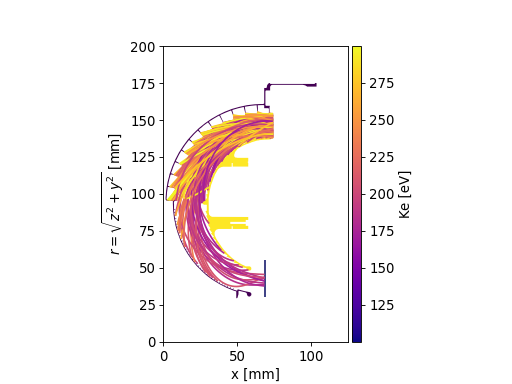

C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:208: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  e_tot+=len(elec)
C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:211: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in elec:
C:\ProgramData\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(0.0, 200.0)

In [20]:
fig,ax = esa.fly_trajectory(200)
ax.set_xlim(0,125)
ax.set_ylim(0,200)

Fly 10000 particles

In [21]:
esa.fly(10000)

<class 'simPyon.simPyon.data.sim_data'>
 Size:(20000, 19)
 Obs Region {'X_MAX': 81, 'X_MIN': 72, 'R_MAX': 45.1, 'R_MIN': 35.4, 'TOF_MEASURE': True, 'R_WEIGHT': True}

access the resulting data using the ```.data``` parameter and plot source distribution 

<IPython.core.display.Javascript object>


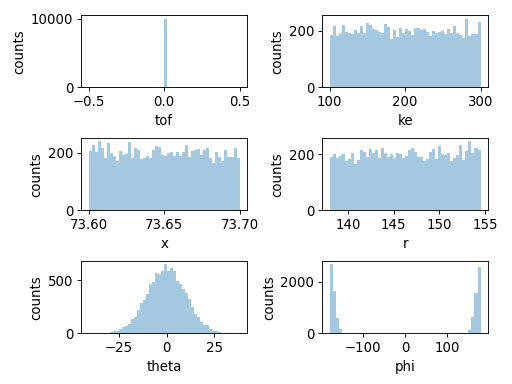

(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: xlabel='tof', ylabel='counts'>,
         <Axes: xlabel='ke', ylabel='counts'>],
        [<Axes: xlabel='x', ylabel='counts'>,
         <Axes: xlabel='r', ylabel='counts'>],
        [<Axes: xlabel='theta', ylabel='counts'>,
         <Axes: xlabel='phi', ylabel='counts'>]], dtype=object))

In [22]:
esa.data.start().show()

Redefine the observaation box defined by the ```esa.obs_region``` paramter. Look at the distribution functions of the particles that collide within the box

The default observation box is defined in ``simPyon/defaults``, But they are also stored and can be changed in the ``esa.data.obs`` variable.

<IPython.core.display.Javascript object>


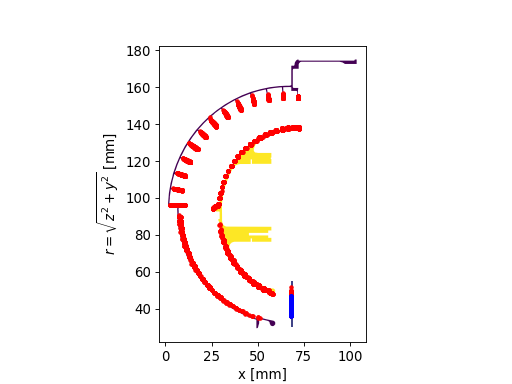

C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:208: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  e_tot+=len(elec)
C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\poly_gem.py:211: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in elec:
C:\ProgramData\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<IPython.core.display.Javascript object>


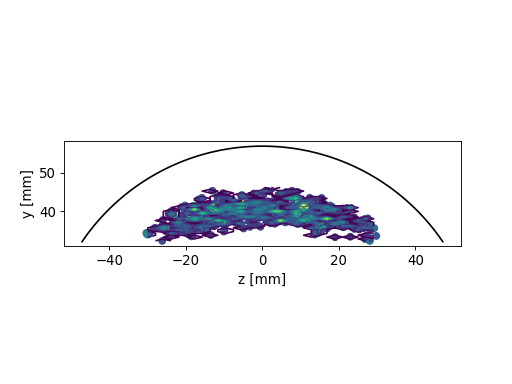

C:\Users\Jonny Woof\Google Drive\Python_packages_woof\simPyon\simPyon\simion.py:606: RuntimeWarning: invalid value encountered in sqrt
  return(np.sqrt(r**2 - x_vec**2))


<IPython.core.display.Javascript object>


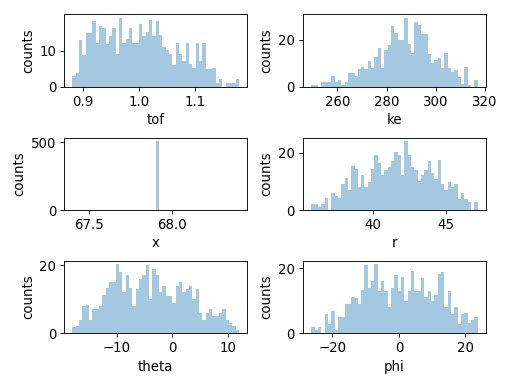

(<Figure size 640x480 with 6 Axes>,
 array([[<Axes: xlabel='tof', ylabel='counts'>,
         <Axes: xlabel='ke', ylabel='counts'>],
        [<Axes: xlabel='x', ylabel='counts'>,
         <Axes: xlabel='r', ylabel='counts'>],
        [<Axes: xlabel='theta', ylabel='counts'>,
         <Axes: xlabel='phi', ylabel='counts'>]], dtype=object))

In [23]:
esa.obs_region['X_MAX'] = 75
esa.obs_region['X_MIN'] = 62
esa.obs_region['R_MAX'] = 57
esa.obs_region['R_MIN'] = 29

#plot the collsion locations of the particles that fall within the box
esa.show(collision_locs = True)
# Plot the distributions of the particles that fall within the observation box
esa.data.good().stop().show()

To output the flown data, you can simply grab the data frame

In [13]:
data = esa.data.df
data

,ion n,tof,x,y,z,azm,elv,vx,vy,vz,ke,r,omega,vr,vtheta,theta,phi,counts,is_start
0,1.0,0.000000,73.6672,143.420,0.000000,-176.786,2.53515,-184.140,8.16577,10.34070,176.613,143.420000,0.000000,8.165770,-10.340700,2.535154,-176.785832,0.980368,True
1,1.0,0.221392,32.9000,145.228,2.289340,-176.786,2.53515,-184.140,8.16577,10.34070,176.613,145.246043,0.015762,8.327744,-10.210708,2.585475,-176.826154,0.980368,False
2,2.0,0.000000,73.6401,147.887,0.000000,171.349,15.41340,-144.206,40.21480,-21.94140,118.640,147.887000,0.000000,40.214800,21.941400,15.413398,171.348620,1.010903,True
3,2.0,0.186123,46.8000,155.372,-4.083800,171.349,15.41340,-144.206,40.21480,-21.94140,118.640,155.425660,-0.026278,40.777425,20.877183,15.634514,171.762333,1.010903,False
4,3.0,0.000000,73.6017,154.214,0.000000,-165.366,5.92983,-140.949,15.13070,36.80400,111.158,154.214000,0.000000,15.130700,-36.804000,5.929835,-165.365922,1.054152,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9998.0,0.098081,55.9000,153.258,3.612860,-168.490,17.42760,-180.891,57.94870,36.83540,194.001,153.300578,0.023569,58.800711,-35.459483,17.692188,-168.909126,1.008763,False
19996,9999.0,0.000000,73.6228,150.740,0.000000,-178.751,-1.35079,-139.147,-3.28187,3.03335,100.439,150.740000,0.000000,-3.281870,-3.033350,-1.350786,-178.751172,1.030405,True
19997,9999.0,0.242354,39.9000,149.945,0.735146,-178.751,-1.35079,-139.147,-3.28187,3.03335,100.439,149.946802,0.004903,-3.266959,-3.049404,-1.344648,-178.744565,1.030405,False
19998,10000.0,0.000000,73.6783,141.574,0.000000,179.129,5.71638,-233.161,23.34260,-3.54295,284.612,141.574000,0.000000,23.342600,3.542950,5.716385,179.129441,0.967749,True


you can also output the start and stop data separately

In [14]:
start_data = esa.data.start().df
stop_data = esa.data.stop().df